In [ ]:
#!pip install transformers~=2.11.0
!pip install transformers

     |████████████████████████████████| 2.8 MB 7.0 MB/s 
     |████████████████████████████████| 636 kB 80.5 MB/s 
     |████████████████████████████████| 895 kB 74.1 MB/s 
     |████████████████████████████████| 3.3 MB 77.6 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import re
import string 
from textblob import TextBlob

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## OLD START

In [ ]:
from bs4 import BeautifulSoup
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)
    
    text = re.sub('\[[^]]*\]', '', text)
    
    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()



    return text

In [ ]:
"""
df_en = pd.read_csv('/content/drive/MyDrive/Thesis/final_en_data.csv')
df_bn = pd.read_csv('/content/drive/MyDrive/Thesis/final_bn_data.csv')
df_bn = df_bn.drop(['category'],axis=1)

df_bn.label = df_bn.label.astype(int)
"""
from google.colab import drive
drive.mount('/content/drive')

df_bn = pd.read_csv('/content/drive/MyDrive/Thesis/all_clean_bengali.csv')


In [ ]:
"""
frames = [df_bn, df_en]
result = pd.concat(frames)
#df = result.reindex()
df = result.sample(frac=1).reset_index(drop=True)
df['target'].value_counts()
"""

"\nframes = [df_bn, df_en]\nresult = pd.concat(frames)\n#df = result.reindex()\ndf = result.sample(frac=1).reset_index(drop=True)\ndf['target'].value_counts()\n"

In [ ]:
#df['text'] = df['text'].astype(str)
df_en['text'] = df_en['text'].astype(str)
df_bn['text'] = df_bn['text'].astype(str)

In [ ]:
#df_en= df.rename({'headline': 'title', 'content': 'text','label': 'target'}, axis=1)

In [ ]:
#df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df_en = df_en.dropna(axis=1)
df_en.drop_duplicates(inplace= True)
df_en.duplicated().sum()

#df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df_bn.drop( df_bn[df_bn.text.str.len() < 10].index, inplace=True)
df_bn = df_bn.dropna(axis=1)
df_bn.drop_duplicates(inplace= True)
df_bn.duplicated().sum()


0

In [ ]:
df_en.head()

,title,text,target
0,"Invoking religion, a more disciplined Trump sp...",invoking religion disciplined trump speaks uni...,1
1,Top Trump lieutenant Scaramucci lashes colleag...,top trump lieutenant scaramucci lash colleague...,1
2,Let Us Now Praise Famous Trumps,let u praise famous trump november 7 2016 1026...,0
3,U.S. seeks ship ban over North Korea violation...,u seek ship ban north korea violation moon pos...,1
4,Links 11/3/16,link 11316 november 3 2016 714 hostility towar...,0


In [ ]:
"""
#df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df.drop( df[df.text.str.len() < 10].index, inplace=True)
train_df = df.dropna(axis=1)
train_df.drop_duplicates(inplace= True)
train_df.duplicated().sum()
"""

0

In [ ]:
#train_df.isnull().sum()

In [ ]:
#train_df.head()

## #OLD END

In [ ]:
"""
df_en = df_en.sample(frac=1)
train_size = int(0.85*len(df_en))

en_train_set = df_en[:train_size]
en_test_set = df_en[train_size:]

df_bn = df_bn.sample(frac=1)
train_size = int(0.85*len(df_bn))

bn_train_set = df_bn[:train_size]
bn_test_set = df_bn[train_size:]

In [ ]:
"""
frames = [bn_train_set, en_train_set]
result = pd.concat(frames)
#df = result.reindex()
df_train = result.sample(frac=1).reset_index(drop=True)
df_train['target'].value_counts()



frames = [bn_test_set, en_test_set]
result = pd.concat(frames)
#df = result.reindex()
df_test = result.sample(frac=1).reset_index(drop=True)
df_test['target'].value_counts()
"""

1    38172
0    29444
Name: target, dtype: int64

1    6805
0    5128
Name: target, dtype: int64

In [ ]:
"""
from sklearn.model_selection import train_test_split
from collections import Counter

X = df_train.text.values
y = df_train.target.values

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42,test_size=0.2, stratify = y)

X_test = np.asanyarray(df_test.text.values)
y_test = np.asanyarray(df_test.target.values)

"""

In [ ]:

from sklearn.model_selection import train_test_split
from collections import Counter

X = df_en.text.values
y = df_en.target.values

X_en_train, X_en_val, y_en_train, y_en_val = train_test_split(X, y, random_state=42,test_size=0.3, stratify = y)




In [ ]:

# we will use temp_text and temp_labels to create validation and test set
X_en_val, X_en_test, y_en_val, y_en_test = train_test_split(X_en_val, y_en_val, 
                                                                random_state=42, 
                                                                test_size=0.3,  stratify = y_en_val)

In [ ]:
print(Counter(y_en_train))
print(Counter(y_en_val))
print(Counter(y_en_test))

Counter({1: 24480, 0: 21026})
Counter({1: 7344, 0: 6308})
Counter({1: 3148, 0: 2703})


In [ ]:

from sklearn.model_selection import train_test_split
from collections import Counter

X = df_bn.text.values
y = df_bn.target.values

X_bn_train, X_bn_val, y_bn_train, y_bn_val = train_test_split(X, y, random_state=42,test_size=0.3, stratify = y)

# we will use temp_text and temp_labels to create validation and test set
X_bn_val, X_bn_test, y_bn_val, y_bn_test = train_test_split(X_bn_val, y_bn_val, 
                                                                random_state=42, 
                                                                test_size=0.3,  stratify = y_bn_val)



In [ ]:
print(Counter(y_bn_train))
print(Counter(y_bn_val))
print(Counter(y_bn_test))

Counter({1: 6984, 0: 3160})
Counter({1: 2095, 0: 948})
Counter({1: 899, 0: 406})


In [ ]:

X_train = np.concatenate((X_en_train, X_bn_train))
X_val = np.concatenate((X_en_val, X_bn_val))
X_test = np.concatenate((X_en_test, X_bn_test))

y_train = np.concatenate((y_en_train, y_bn_train))
y_val = np.concatenate((y_en_val, y_bn_val))
y_test = np.concatenate((y_en_test, y_bn_test))



In [ ]:
print(Counter(y_train))
print(Counter(y_val))
print(Counter(y_test))

Counter({1: 30613, 0: 23505})
Counter({1: 7654, 0: 5876})
Counter({1: 6710, 0: 5229})


In [ ]:
print(Counter(y_val))
print(Counter(y_test))

Counter({1: 9439, 0: 7256})
Counter({1: 4047, 0: 3109})


In [ ]:
X_train.shape,X_val.shape, X_test.shape

((55650,), (16695,), (7156,))

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

Original:  ৮ দিনে ১৮ বিল পাস । দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে । কার্যত অধিবেশনই রয়েছে বর্তমান সরকারের । অক্টোবরের মাঝামাঝিতে সংক্ষিপ্ত অধিবেশন ডেকেই ‍ইিত টানা সংসেদর । এরপর ডিসেম্বরের শেষ সপ্তাহে একাদশ সংসদ নির্বাচনের সংখ্যাগরিষ্ঠতা পাবেন তারাই সরকার গঠন । জানুয়ারিতে বসতে সরকারের অধিবেশন । বর্তমান সরকারের পাঁচ বছর পূর্ণ বছরের ২৮ জানুয়ারি । সংবিধান অনুযায়ী বিদ্যমান সংসদ ভেঙে দেওয়ার আগের ৯০ দিনের পরবর্তী সংসদ নির্বাচন কথা রয়েছে । হিসেবে অক্টোবর নির্বাচনের কাউন ডাউন । সরকারের মহলের আলোচনার পরিপ্রেক্ষিতে ধারণা ২৮ অক্টোবরের মধ্য নির্বাচনকালীন সরকার গঠন । সরকার রুটিন ওয়ার্ক । দেশে উদ্বুদ্ধ পরিস্থিতির সৃষ্টি রাষ্ট্রপতি চাইলে যেকোনো সময় অধিবেশন আহ্বান । এদিকে দশম জাতীয় সংসদের ২২তম অধিবেশনটি রেকর্ডের খাতায় লেখা । কেননা অধিবেশনের আট কার্যদিবসের ইতোমধ্যেই ১৪টি বিল পাস হয়ে শেষ দিনে চারটি পাস । হিসেবে অনন্য উচ্চতায় অধিবেশন । এতো অল্প সময়ে সংখ্যক বিল পাসের নজির । গত ৯ সেপ্টেম্বর ২২তম অধিবেশন । ২০ সেপ্টেম্বর শেষ । শুক্র শনিবার বাদ দিয়ে টানা ১০ কার্যদিবস অধিবেশন । বর্তমান সংসদের ’ সদস্যের মৃত্যুতে শোক

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

def preprocessing_for_bert(text, target):
  bert_input_ids = []
  bert_attention_masks = []
  label = []
  j=0

  for sent in text:
    tokens = tokenizer.encode_plus(text=text_preprocessing(sent), add_special_tokens=False)
    #tokens = tokenizer.encode_plus(sent, add_special_tokens=False)
    input_ids = tokens['input_ids'] 
    attention_mask = tokens['attention_mask']

    start = 0
    window_size = 510  # we take 2 off here so that we can fit in our [CLS] and [SEP] tokens
    total_len = len(input_ids) #1580

    loop = True

    while loop:
      end = start + window_size #510
      if end >= total_len: #false
        loop = False
        end = total_len
      # (1) extract window from input_ids and attention_mask
      input_ids_chunk = input_ids[start:end]
      attention_mask_chunk = attention_mask[start:end]
      # (2) add [CLS] and [SEP]
      input_ids_chunk = [101] + input_ids_chunk + [102]
      attention_mask_chunk = [1] + attention_mask_chunk + [1]
      # (3) add padding upto window_size + 2 (512) tokens
      input_ids_chunk += [0] * (window_size - len(input_ids_chunk) + 2)
      attention_mask_chunk += [0] * (window_size - len(attention_mask_chunk) + 2)
      # (4) format into PyTorch tensors dictionary

      
      input_dict = {
        'input_ids1': torch.Tensor([input_ids_chunk]).long(),
        'attention_mask1': torch.Tensor([attention_mask_chunk]).int()
      } 
        #print('2')
      bert_input_ids.append(input_dict['input_ids1'])
      
      
        # And its attention mask (simply differentiates padding from non-padding).
      bert_attention_masks.append(input_dict['attention_mask1'])
      

      label.append(target[j])

      start = end
    j=j+1

  # Convert the lists into tensors.
  bert_input_ids = torch.cat(bert_input_ids, dim=0)
  bert_attention_masks = torch.cat(bert_attention_masks, dim=0)



  #labels = torch.tensor(label)
  #sentence_ids = torch.tensor(sentence_ids)
  #print('1')
  # Print sentence 0, now as a list of IDs.
  print('Token IDs BERT:', bert_input_ids[1])

  return bert_input_ids,bert_attention_masks,label

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks, y_train = preprocessing_for_bert(X_train,y_train)

Token indices sequence length is longer than the specified maximum sequence length for this model (1013 > 512). Running this sequence through the model will result in indexing errors


Tokenizing data...
Token IDs BERT: tensor([  101, 12899, 12338, 11227, 11531, 10241, 40717, 10111, 15306, 10104,
        82712, 39112, 22984, 12028, 28961, 50388, 10287, 14142, 15041, 12338,
        10398, 14344, 11404, 40366, 12027, 12732, 94862, 10150, 21973, 11460,
        14408, 12305,   155, 32348, 12338,   128, 29707, 36321, 11706, 12074,
        65068, 10390, 10871, 39156, 10177, 11062, 60375, 14142, 12027, 12878,
        13138, 13094, 12828, 84285, 15308, 11497, 12104, 11050, 11657, 34707,
        10829, 21227, 29307, 12044, 17810, 13172, 12338, 11706, 14463, 15308,
        16473, 11677, 10104, 82712, 12027, 11497, 11332, 65588, 11008, 46328,
        38561, 82748, 10995, 50388, 10873, 11147, 18874, 14149, 39112, 10563,
        11062, 13012, 21334, 50388, 12338, 13651, 46328, 21661, 15929, 23714,
        14121, 15308, 12421, 50388, 17576, 11497, 11402, 11332, 65588, 16971,
        15929, 11706, 14463, 12338, 11008, 46328, 50388, 22866, 42324, 11062,
        12338, 11871, 11395, 

In [ ]:
#len(labels)
#len(bert_input_ids)
#len(bert_attention_masks)
#len(sentence_ids)

print('labels:',len(y_train))
print('input_ids:',len(train_inputs))
print('attention_mask:',len(train_masks))

labels: 88233
input_ids: 88233
attention_mask: 88233


In [ ]:
val_inputs, val_masks, y_val= preprocessing_for_bert(X_val,y_val)

Token IDs BERT: tensor([  101, 15572, 12696, 18560, 13731, 10246, 17978, 39537, 10301, 35635,
        12990, 29808, 17623, 31813, 35635, 29869, 12724, 13979, 18860, 15572,
        18270, 12888, 13543, 20007, 40082, 12312, 20298, 11630, 11672, 25886,
        56946, 12977,   145, 52327, 20007, 11178, 40991, 18592, 14162, 35635,
        61668, 12990, 12214, 18560, 13731, 23016, 12981, 15572, 10552, 12932,
        41895, 24395, 48695, 18560, 15541, 11601, 17623, 17978, 39537, 10301,
        12285, 63760, 11894, 15736, 15474, 14254, 15446, 12990, 10419, 12289,
        12414, 55215, 22991, 18153, 12096, 66731, 21334, 10150, 30109, 10403,
        21811, 29276, 11301, 10417, 10115, 23815, 27183, 17188, 35563, 12947,
        18860, 15572, 10552, 12932, 12263, 92847, 29276, 47173, 10150, 11594,
        10552, 12932, 79917, 10285, 10575, 19131, 12078, 10552, 12932, 10403,
        11443, 10817, 39684, 11410, 56946, 35635, 29869, 18860, 15572, 12096,
        29276, 11301, 10174, 12349, 28427, 13054

In [ ]:
test_inputs, test_masks, y_test = preprocessing_for_bert(X_test,y_test)


Token IDs BERT: tensor([  101, 85431, 59443, 11607, 27126, 46033, 20424, 16497, 67200, 13168,
        32524, 12074, 16534, 15849, 17436, 87545, 17503, 37079, 21518, 95009,
        46033, 27126, 46033, 37216, 11460, 14408, 11101, 27948, 10803, 13934,
        11975, 13645, 32964, 41253, 13113, 41054, 10249, 19135, 10687, 83613,
        25410, 10553, 12827, 56668, 10403, 12290, 38471, 55476, 16674, 43628,
        15282, 10629, 23455, 50040, 15586, 10107, 11975, 13645, 11481, 16674,
        10249, 19135, 10687, 83613, 12027, 24311, 22508, 39827, 19860, 10476,
        19106, 19594, 19860, 10476, 10533, 80366, 23769, 23872, 64960, 74996,
        10107, 19594, 11706, 10916, 11111, 42171, 19009, 16674, 10107, 10249,
        19135, 10687, 83613, 13362, 61566, 10175, 12258, 11923, 30840, 14698,
        14068, 16674, 25069, 46467, 50103, 10399, 18261, 15149, 12486, 16828,
        19594, 11418, 14149, 12728, 13039, 10803, 13934, 11975, 13645, 16674,
        11622, 20807, 21464, 10251, 23458, 14177

In [ ]:
print('labels:',len(y_test))
print('input_ids:',len(test_inputs))
print('attention_mask:',len(test_masks))

labels: 11224
input_ids: 11224
attention_mask: 11224


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 8

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_labels = torch.tensor(y_test)
#test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_data = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel,BertForSequenceClassification

# Create the BertClassfier class
class BertClassifier(nn.Module):
#class BertForSequenceClassification(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
    #def __init__(self, freeze_bert=True):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=2)
        #self.bert = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels = 2)

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.1), ##0.1 #0.2#0.3#0.4
            nn.Linear(H, D_out)
        )


        #Freeze the BERT model
        if freeze_bert:
          for param in self.bert.parameters():
            param.requires_grad = False



        
    def forward(self, input_ids, attention_mask):

        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 0 ns, sys: 121 µs, total: 121 µs
Wall time: 124 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
#from transformers import EarlyStoppingCallback

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      #lr=5e-5,# 63    # Default learning rate
                      lr=2e-5,#94.24#last_problem 1st low val acc
                      #lr=1e-3,#63.53
                      #lr=3e-5,#93.84# d_63#final
                      #lr=4e-5, #main #d_69
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                #num_warmup_steps=0.01,#0.06
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)  
    
  
       
    return bert_classifier, optimizer, scheduler

In [ ]:
#New
#There is a class imbalance in our dataset. The majority of the observations are not spam. 
#So, we will first compute class weights for the labels in the train set and then pass these weights to the loss function 
#so that it takes care of the class imbalance.
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

print("Class Weights:",class_weights)

Class Weights: [1.33905482 0.79795431]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

In [ ]:
class EarlyStopping(object):
    def __init__(self, mode='min', min_delta=0, patience=10, percentage=False):
        self.mode = mode
        self.min_delta = min_delta
        self.patience = patience
        self.best = None
        self.num_bad_epochs = 0
        self.is_better = None
        self._init_is_better(mode, min_delta, percentage)

        if patience == 0:
            self.is_better = lambda a, b: True
            self.step = lambda a: False

    def step(self, metrics):
        if self.best is None:
            self.best = metrics
            return False

        #if torch.isnan(metrics):
        if torch.isnan(torch.tensor(metrics)):
            return True

        if self.is_better(metrics, self.best):
            self.num_bad_epochs = 0
            self.best = metrics
        else:
            self.num_bad_epochs += 1

        if self.num_bad_epochs >= self.patience:
            return True

        return False

    def _init_is_better(self, mode, min_delta, percentage):
        if mode not in {'min', 'max'}:
            raise ValueError('mode ' + mode + ' is unknown!')
        if not percentage:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - min_delta
            if mode == 'max':
                self.is_better = lambda a, best: a > best + min_delta
        else:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - (
                            best * min_delta / 100)
            if mode == 'max':
                self.is_better = lambda a, best: a > best + (
                            best * min_delta / 100)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import time

# Specify loss function
#loss_fn = nn.CrossEntropyLoss() #original
loss_fn = nn.CrossEntropyLoss(weight=weights)
#loss_fn = nn.BCELoss(weight=weights),
#loss_fn  = nn.NLLLoss(weight=weights)

def set_seed(seed_value=100): #42
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    
#def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
def train(model,  early_stopping, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    """Train the BertClassifier model.
    """
    best_valid_loss = float('inf')
    bert_training_stats = []
    # Measure the total training time for the whole run.
    total_t0 = time.time()
    m=1

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure how long the training epoch takes.
        t0 = time.time() #new-----------

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0) #new--------------

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        
        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0) #new-----------

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy, validation_time = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            


              

            # Record all statistics from this epoch.
            bert_training_stats.append({
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': val_loss,
                'Valid. Accur.': val_accuracy,
                'training time' : training_time,
                'validation time' : validation_time
                
                })

            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)


            #if val_loss < best_valid_loss:
              #best_valid_loss = val_loss
              #print(m)
              #torch.save(model.state_dict(), 'saved_weights.pt')
              #m=m+1




            if early_stopping.step(val_loss): 
              print(m)
              torch.save(model.state_dict(), 'saved_weights.pt')
              m=m+1
              break

        print("\n")
        print("  Training epcoh took: {:}".format(training_time))
        print("  Validation took: {:}".format(validation_time))
        print("\n")
    
    print("Training complete!")

    return bert_training_stats, model


def evaluate(model, val_dataloader):

    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.


    t0 = time.time() #new------------
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []
    loss = 0
    accuracy = 0

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)


    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0) #new---------------


    return val_loss, val_accuracy, validation_time

In [ ]:

set_seed(200)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=8)
bert_training_stats, model = train(bert_classifier, train_dataloader, val_dataloader, epochs=8, evaluation=True)



Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.686088   |     -      |     -     |   9.68   
   1    |   40    |   0.680448   |     -      |     -     |   9.21   
   1    |   60    |   0.671741   |     -      |     -     |   9.21   
   1    |   80    |   0.481694   |     -      |     -     |   9.20   
   1    |   100   |   0.560934   |     -      |     -     |   9.20   
   1    |   120   |   0.511234   |     -      |     -     |   9.20   
   1    |   140   |   0.371765   |     -      |     -     |   9.20   
   1    |   160   |   0.520624   |     -      |     -     |   9.20   
   1    |   180   |   0.469775   |     -      |     -     |   9.21   
   1    |   200   |   0.492679   |     -      |     -     |   9.21   
   1    |   220   |   0.398277   |     -      |     -     |   9.21   
   1    |   240   |   0.421888   |     -      |     -     |   9.20   


In [ ]:

set_seed(200)    # Set seed for reproducibility

bert_classifier, optimizer, scheduler = initialize_model(epochs=12)
#early_stopping = EarlyStopping(patience=3)
bert_training_stats, model = train(bert_classifier, EarlyStopping(patience=2), train_dataloader, val_dataloader, epochs=12, evaluation=True)



Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.693554   |     -      |     -     |   16.64  
   1    |   40    |   0.661577   |     -      |     -     |   16.18  
   1    |   60    |   0.576200   |     -      |     -     |   16.38  
   1    |   80    |   0.483502   |     -      |     -     |   16.97  
   1    |   100   |   0.490728   |     -      |     -     |   17.47  
   1    |   120   |   0.464751   |     -      |     -     |   18.39  
   1    |   140   |   0.523052   |     -      |     -     |   19.13  
   1    |   160   |   0.511534   |     -      |     -     |   18.47  
   1    |   180   |   0.431577   |     -      |     -     |   18.12  
   1    |   200   |   0.546775   |     -      |     -     |   18.04  
   1    |   220   |   0.361038   |     -      |     -     |   18.18  
   1    |   240   |   0.406553   |     -      |     -     |   18.42  


In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=bert_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,training time,validation time
epoch,,,,,
1,0.29,0.23,91.75,2:47:54,0:16:57
2,0.21,0.22,92.32,2:47:30,0:16:50
3,0.18,0.23,92.32,2:47:26,0:16:47
4,0.19,0.34,92.57,2:47:29,0:16:41


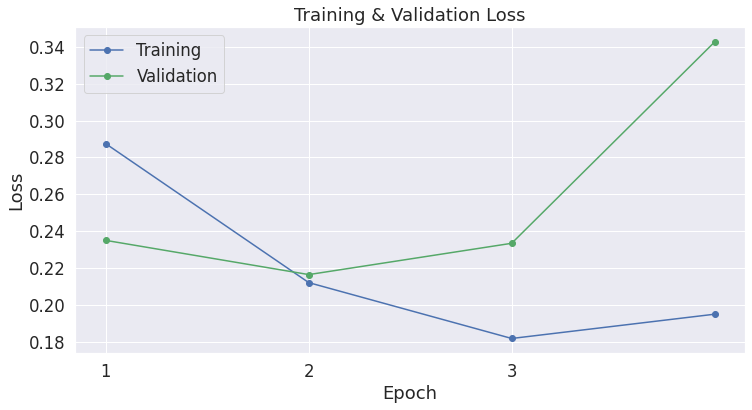

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return y_pred

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

AUC: 0.9785
Accuracy: 92.69%


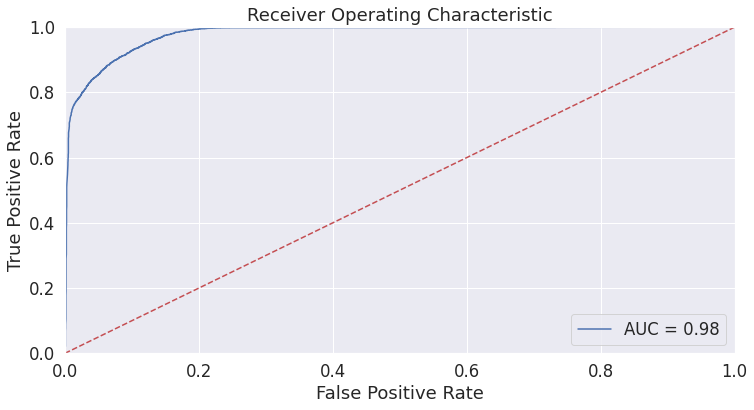

In [ ]:
# Compute predicted probabilities on the test set
path = 'saved_weights.pt'
bert_classifier.load_state_dict(torch.load(path))
#probs = bert_predict(bert_classifier, test_dataloader)
probs = bert_predict(bert_classifier, test_dataloader)

#probs = bert_predict(new_model, test_dataloader)

# Evaluate the Bert classifier
y_pred = evaluate_roc(probs, y_test)

In [ ]:
data = ({'Original': y_test, 'Predicted': y_pred})

df_prediction = pd.DataFrame(data=data)

In [ ]:
df_prediction.head()

In [ ]:
len(y_pred), len(y_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['Fake','True']
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4297
           1       0.91      0.98      0.94      6927

    accuracy                           0.93     11224
   macro avg       0.93      0.91      0.92     11224
weighted avg       0.93      0.93      0.93     11224

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4297
           1       0.91      0.98      0.94      6927

    accuracy                           0.93     11224
   macro avg       0.93      0.91      0.92     11224
weighted avg       0.93      0.93      0.93     11224



### Prediction

In [ ]:
!pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 75.3 MB/s 
     |████████████████████████████████| 1.2 MB 66.7 MB/s 
     |████████████████████████████████| 743 kB 88.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
pip install banglanltk

     |████████████████████████████████| 462 kB 5.3 MB/s 


In [ ]:
from bs4 import BeautifulSoup
import re 
import nltk

nltk.download("stopwords")   
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords 
lemma = nltk.WordNetLemmatizer()

# function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()


# function to remove accented characters
import unicodedata
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase




# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)
 
import string
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text


# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

"""
# function for stemming
def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

"""




#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def en_cleaning(text):
    text = remove_html_tags(text)
    text = decontracted(text)    
    text = remove_accented_chars(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_extra_whitespace_tabs(text)
    #text = remove_stopwords_and_lemmatization(text)
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from bs4 import BeautifulSoup
import re 

from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

#from bnltk.stemmer import BanglaStemmer

import banglanltk as bn

# function to remove HTML tags
def bn_remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()


 
import string
# function to remove punctuation
def bn_remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text


# function to remove special characters
def bn_remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

def bn_remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
        
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)





def bn_lemmatization(text):

    #text1 = bn.stemmer(text)
    return bn.stemmer(text)




#Total function
def bn_cleaning(text):
    text = bn_remove_html_tags(text)
  
    #text = bn_remove_bn_stopwords(text)
    
    text = bn_remove_punctuation(text)
    text = bn_remove_extra_whitespace_tabs(text)
    #text = bn_lemmatization(text)
  
    return text



In [ ]:
from textblob import TextBlob

def sentence_detecting(sent):
  lang = TextBlob(sent)
  if lang.detect_language() == 'en':
    text = en_cleaning(sent)
    #text = df_en['text'].apply(en_cleaning)
    #print("english")
  else:
    text = bn_cleaning(sent)
    print('bengali')

  return text



In [ ]:
text=sentence_detecting(sentence1)

In [ ]:
print(text)

iran beefing military presence along border afghanistan since early may usled foreign troop began complete withdrawal wartorn nation taliban started aggressive offensive afghan government force since last weekend iranian border guard constant alert taliban fighter stand guard side border taliban currently control half afghanistan approximately 400 district also several provincial capital according un refugee agency unhcr nearly 250000 afghan internally displaced due latest bout violence many people including soldier fled toward iran seek refuge august 6 taliban captured zaranj capital nimruz province border iran immediately afterward entire convoy military vehicle carrying afghan army soldier fled across border afghan border guard also fled iran surrendering weapon iranian border guard


In [ ]:
def predict (text):
  bert_input_ids = []
  bert_attention_masks = []
  sentence_ids = []
  counter = 0
  label = []


  for sent in text:
    tokens = tokenizer.encode_plus(text=text_preprocessing(sent), add_special_tokens=False)
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']

    start = 0
    window_size = 510  # we take 2 off here so that we can fit in our [CLS] and [SEP] tokens
    total_len = len(input_ids) #1580

    loop = True

    while loop:
      end = start + window_size #510
      if end >= total_len: #false
        loop = False
        end = total_len
      # (1) extract window from input_ids and attention_mask
      input_ids_chunk = input_ids[start:end]
      attention_mask_chunk = attention_mask[start:end]
      # (2) add [CLS] and [SEP]
      input_ids_chunk = [101] + input_ids_chunk + [102]
      attention_mask_chunk = [1] + attention_mask_chunk + [1]
      # (3) add padding upto window_size + 2 (512) tokens
      input_ids_chunk += [0] * (window_size - len(input_ids_chunk) + 2)
      attention_mask_chunk += [0] * (window_size - len(attention_mask_chunk) + 2)
      # (4) format into PyTorch tensors dictionary


      
      input_dict = {
        'input_ids1': torch.Tensor([input_ids_chunk]).long(),
        'attention_mask1': torch.Tensor([attention_mask_chunk]).int()
      } 
      
      bert_input_ids.append(input_dict['input_ids1'])
      
        # And its attention mask (simply differentiates padding from non-padding).
      bert_attention_masks.append(input_dict['attention_mask1'])

 
      
      start = end

  print(len(bert_input_ids))
  # Convert the lists into tensors.
  bert_input_ids = torch.cat(bert_input_ids, dim=0)
  bert_attention_masks = torch.cat(bert_attention_masks, dim=0)




  batch_size = 8  

  # Create the DataLoader.
  prediction_data = TensorDataset(bert_input_ids, bert_attention_masks)
  # prediction_data = TensorDataset(input_ids, attention_masks)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)


  # Compute predicted probabilities on the test set
  path = 'saved_weights.pt'
  model.load_state_dict(torch.load(path))
  #probs = bert_predict(bert_classifier, test_dataloader)
  probs = bert_predict(model, prediction_dataloader)



   # Get predictions from the probabilities
  threshold = 0.9
  preds = np.where(probs[:, 1] > threshold, 1, 0)
  #print(preds)


  y_pred = np.bincount(preds).argmax()
  print(y_pred)
  

  #if max(y_pred,key=y_pred.count) ==1:
  if y_pred ==1:
    print('The news is true')
  else:
    print('The news is false')


  #return bert_input_ids,bert_attention_masks,labels

In [ ]:
sentence ="নোয়াখালীর বেগমগঞ্জে ধর্ষণে ব্যর্থ হয়ে বিবস্ত্র করে নির্যাতনের ঘটনায় করা মামলায় আদালতে সাক্ষী দিয়েছেন ভুক্তভোগী সেই নারী (৩৭)। আজ বৃহস্পতিবার বেলা সাড়ে ১১টার দিকে আদালতে নির্যাতনের বর্ণনা তুলে ধরতে গিয়ে আবেগাপ্লুত হয়ে পড়েন তিনি। নোয়াখালীর নারী ও শিশু নির্যাতন দমন ট্রাইব্যুনাল-১–এর বিচারক (জেলা জজ) জয়নাল আবদীন মামলার বাদীর সাক্ষী গ্রহণ করেন। এদিকে বাদীর সাক্ষ্য গ্রহণ শেষে আসামিদের কোর্ট হাজতে নেওয়ার পথে কর্তব্যরত গণমাধ্যম কর্মীদের ওপর চড়াও হন দেলোয়ার বাহিনীর প্রধান দেলোয়ার ও তাঁর সহযোগীরা। তাঁরা পুলিশের সামনেই একাধিক সাংবাদিকের হাত থেকে ক্যামেরা, মুঠোফোন ছিনিয়ে নেওয়ার চেষ্টা করেন। এ সময় তাঁরা সাংবাদিকদের নানা গালমন্দও করেন। বিজ্ঞাপন আদালতে রাষ্ট্রপক্ষের কৌঁসুলি (পিপি) মামুনুর রশিদ ধর্ষণচেষ্টা ও নির্যাতনের মামলায় বাদীর সাক্ষ্য গ্রহণের বিষয়টি নিশ্চিত করেছেন। আদালত থেকে বেরিয়ে দুপুরে নিজ কার্যালয়ে প্রথম আলোকে তিনি বলেন, বাদীর সাক্ষ্য গ্রহণের মধ্য দিয়ে নোয়াখালীর বেগমগঞ্জের একলাশপুরের আলোচিত ধর্ষণের চেষ্টা ও নির্যাতনের ঘটনায় হওয়া মামলার বিচারকাজ আরও এক ধাপ এগুলো। তিনি বলেন, নির্যাতনের ঘটনা তুলে ধরতে গিয়ে আবেগাপ্লুত হয়ে পড়েন ভুক্তভোগী নারী। পিপি মামুনুর রশিদ বলেন, বাদীর সাক্ষ্য গ্রহণকালে আদালতে মামলার অভিযোগপত্রভুক্ত ১৩ আসামির মধ্যে ৯ জন উপস্থিত ছিলেন। এ মামলায় তদন্তকারী সংস্থা পিবিআই ১৩ জন আসামির বিরুদ্ধে আদালতে অভিযোগপত্র দাখিল করেছে, যাঁদের মধ্যে চারজন আসামি পলাতক। এ ছাড়া গ্রেপ্তার হওয়া একজন আসামির (স্থানীয় ইউপি সদস্য মোয়াজ্জেম হোসেন ওরফে সোহাগ) বিরুদ্ধে অভিযোগের সত্যতা না পাওয়ায় আদালত তাঁকে মামলা থেকে অব্যাহতি দিয়েছেন। আদালত সূত্রে জানা গেছে, এর আগে একই আদালতে গতকাল বুধবার একই নারীকে ধর্ষণের অভিযোগে করা আরেকটি মামলায় সাক্ষী দেন তিনি। বিবস্ত্র করে নির্যাতনের ঘটনার এক বছর আগে দেলোয়ার হোসেন ও তাঁর সহযোগী আবুল কালামের বিরুদ্ধে ওই নারী আদালতে ধর্ষণের অভিযোগে সাক্ষী প্রদান করেন। ২০২০ সালের ২ সেপ্টেম্বর রাতে ঘরে ঢুকে স্বামীকে বেঁধে রেখে নারীকে বিবস্ত্র করে ধর্ষণের চেষ্টা করে বেগমগঞ্জ উপজেলার একলাশপুর এলাকার দেলোয়ার বাহিনীর সদস্যরা। তাঁরা ওই নারীকে বিবস্ত্র করে নির্মম নির্যাতনের ভিডিও চিত্র ধারণ করে রাখেন। পরে ওই নারীকে হামলাকারীরা কুপ্রস্তাব দেন। তিনি তাতে রাজি না হওয়ায় তাঁরা ধারণ করা ভিডিও চিত্র গত ৪ অক্টোবর সামাজিক যোগাযোগমাধ্যমে ছেড়ে দেন, যা মুহূর্তের মধ্যে ভাইরাল হয়ে যায়। এতে ঘটনাটি জানাজানি হয় এবং সারা দেশে নিন্দা ও প্রতিবাদের ঝড় ওঠে। এ ঘটনায় ওই দিন (৪ অক্টোবর) রাতেই নির্যাতনের শিকার নারী বাদী হয়ে দেলোয়ার বাহিনীর প্রধান সহযোগী নুর হোসেন ওরফে বাদলসহ ৯ জনের নাম উল্লেখ করে এবং অজ্ঞাতনামা আরও সাত-আটজনকে আসামি করে থানায় পৃথক দুটি মামলা করেন। একটি মামলা রেকর্ড করা হয় নারী ও শিশু নির্যাতন দমন আইনে। আর অপরটি রেকর্ড করা হয় পর্নোগ্রাফি নিয়ন্ত্রণ আইনে। এরপর একই নারী দেলোয়ার বাহিনীর প্রধান দেলোয়ার ও তাঁর প্রধান সহযোগী আবুল কালামের বিরুদ্ধে এক বছর আগে ধর্ষণের একটি মামলা করেন। তিনটি মামলাই তদন্ত করে আদালতে অভিযোগপত্র দিয়েছে পিবিআই। সূত্র জানায়, সাক্ষ্য গ্রহণকালে আদালতে রাষ্ট্রপক্ষকে সহায়তা করেন জ্যেষ্ঠ আইনজীবী ও জেলা বারের সাবেক সভাপতি মোল্লা হাবিবুর রাছুল মামুন। আর আসামিপক্ষে ছিলেন আবদুর শহিদ, জসিম উদ্দিনসহ বেশ কয়েকজন আইনজীবী। আদালতে উপস্থিত ছিলেন জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের নৃবিজ্ঞান বিভাগের অধ্যাপক রেহনুমা আহমেদসহ বাংলাদেশ মহিলা আইনজীবী সমিতির প্রতিনিধি ও জেলা নারী অধিকার জোটের নেতারা। মামলার পরবর্তী তারিখ ২৩ আগস্ট।"

In [ ]:
sentence1 ="Bangladesh wicketkeeper-batsman Mushfiqur Rahim, opener Liton Das and leg-spinner Aminul Islam -- all of whom missed the Australia T20Is at home -- were recalled to the squad as the Bangladesh Cricket Board (BCB) announced a 19-member squad for their upcoming five-match T20I series against New Zealand, starting from September 1. Mushfiqur, Liton and Aminul had to leave the bio-bubble in Harare, placed during the Tigers' tour of Zimbabwe in July, due to personal reasons and were left out of the following Australia series at home for not being able to re-enter the bio-bubble for that series in time. Mohammad Mithun, who was part of the Australia T20I series, is the only player dropped for the T20Is against the Kiwis. Mithun was one of the players from the Tigers' ODI squad for the Zimbabwe tour that the BCB had asked to stay back for the Australia T20Is in order to make up for the missing players. Squad: Mahmudullah (Captain), Shakib Al Hasan, Mushfiqur Rahim, Soumya Sarkar, Litton Das, Mosaddek Hossain, Afif Hossain, Naim Sheikh, Nurul Hasan Sohan, Shamim Hossain, Rubel Hossain, Mustafizur Rahman, Taskin Ahmed, Mohammad, Shoriful Islam, Taijul Islam, Mahedi Hasan, Aminul Islam Biplob, Nasum Ahmed"

In [ ]:
predict (sentence1)

1214
0
The news is false


In [ ]:
#create a temporary file
import os
os.mkdir("/content/fine_bert_model")

In [ ]:
output_dir = "/content/fine_bert_model"

In [ ]:
pip install -U ray

     |████████████████████████████████| 51.0 MB 68 kB/s 
     |████████████████████████████████| 72 kB 660 kB/s 
     |████████████████████████████████| 127 kB 89.1 MB/s 
     |████████████████████████████████| 65 kB 4.7 MB/s 
     |████████████████████████████████| 10.1 MB 61.1 MB/s 
     |████████████████████████████████| 1.3 MB 55.7 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
     |████████████████████████████████| 3.1 MB 51.7 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 
     |████████████████████████████████| 142 kB 81.2 MB/s 
     |████████████████████████████████| 294 kB 80.1 MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-py3-none-any.whl size=12617 sha256=672534d4ce51b6fe8cbeb9951bef1467299f71ac6901af766bd027645085f3d8
  Stored in directory: /root/.cache/pip/wheels/e6/67/af/f1ad15974b8fd95f59a63dbf854483ebe5c7a46a93930798b8
Successfully built gpustat


In [ ]:
best_trial = BertClassifier.hyperparameter_search(
    direction="maximize",
    backend="ray",
    n_jobs=4,  # number of parallel jobs, if multiple GPUs
    n_trials=4,  # number of hyperparameter samples
    # Aggressive termination of trials
    scheduler=AsyncHyperBand())

AttributeError: ignored